<a href="https://colab.research.google.com/github/yashikart/Blood-Group-Detection-Using-Fingerprints/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data cleanning**


In [ ]:
df = pd. read_excel("/content/drive/MyDrive/Blood Group Detection/fingerprint_data.xlsx")

def extract_blood_group(image_name):
    return image_name.split('_')[0]  # Extracts the first part before the first underscore

# Filter out rows with "Augmented" in Image Name
df = df[~df["Image Name"].str.contains("Augmented", case=False, na=False)]
df = df[~df["Image Name"].str.contains("augmented", case=False, na=False)]

df["Image Name"] = df["Image Name"].apply(extract_blood_group)

# Remove rows where Blood Group is "Copy of A-"
df = df[df["Image Name"] != "Copy of A-"]

df.rename(columns={"Image Name": "Blood Group"}, inplace=True)

print(df.columns)

Index(['Blood Group', 'Pattern Type', 'Total Minutiae Points', 'Ridge Count',
       'Ridge Density', 'Core-Delta Distance', 'Ending X', 'Ending Y',
       'Bifurcation X', 'Bifurcation Y'],
      dtype='object')


In [ ]:
df = df[['Blood Group', 'Pattern Type', 'Total Minutiae Points', 'Ridge Count',
       'Ridge Density', 'Core-Delta Distance']]

df.head()

,Blood Group,Pattern Type,Total Minutiae Points,Ridge Count,Ridge Density,Core-Delta Distance
0,O+,Loop,136,37243,0.286784,204.002451
1990,A+,Loop,112,38445,0.319733,158.028478
2001,O-,Loop,184,35513,0.315013,13.453624
2002,O-,Loop,294,38913,0.281884,41.109610
2003,O-,Loop,344,38575,0.253076,67.186308


## **Exploratory data analysis (EDA)**

<ipython-input-22-78ac40bea4e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Blood Group"], palette="viridis")


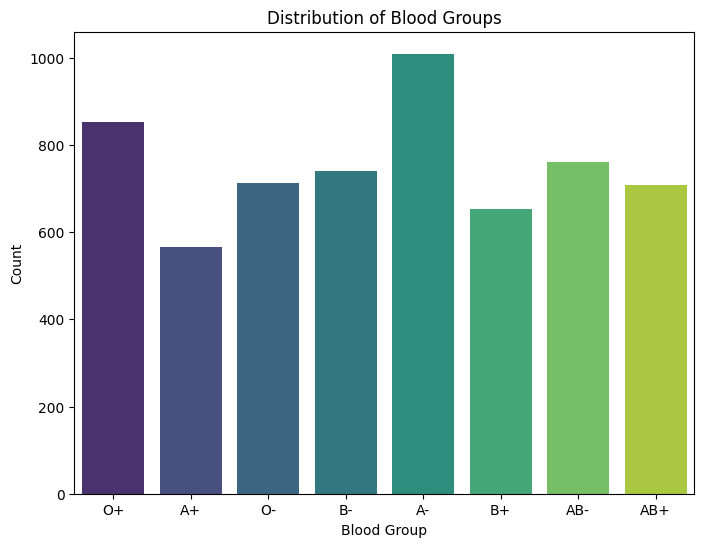

In [ ]:
# Blood Group Distribution Plot
plt.figure(figsize=(8,6))
sns.countplot(x=df["Blood Group"], palette="viridis")
plt.xlabel("Blood Group")
plt.ylabel("Count")
plt.title("Distribution of Blood Groups")
plt.show()


**Blood Group Distribution Plot**

*Interpretation*: The dataset contains 6001 samples, and this bar graph shows the count of different blood groups. The most frequent blood group is A- (705 samples), followed by O+ (551 samples), while AB- (52 samples) has the lowest count.
*Importance:* Understanding blood group distribution is crucial for blood donation drives and medical resource allocation. This data helps hospitals and blood banks predict demand for specific blood types.

In [ ]:
# Create a table showing the distribution of Pattern Types across Blood Groups
pattern_distribution = df.groupby(["Blood Group", "Pattern Type"]).size().unstack().fillna(0)
print(pattern_distribution)


Pattern Type  Arch  Loop  Whorl
Blood Group                    
A+             402   157      7
A-             268   705     36
AB+            394   311      3
AB-             52   552    157
B+             385   261      6
B-             471   249     21
O+             287   551     14
O-              64   542    106


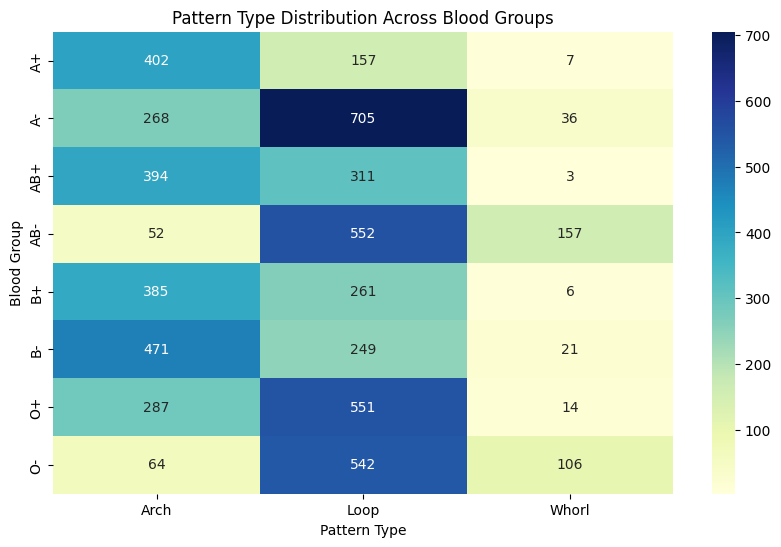

In [ ]:
# Heatmap for visualizing Pattern Type distribution across Blood Groups
plt.figure(figsize=(10,6))
sns.heatmap(pattern_distribution, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel("Pattern Type")
plt.ylabel("Blood Group")
plt.title("Pattern Type Distribution Across Blood Groups")
plt.show()

*Interpretation*: The heatmap visualizes the relationship between blood groups and fingerprint patterns (Arch, Loop, Whorl). The numbers indicate how many times each pattern appears in a specific blood group.
*Importance*: This can be useful in forensic science and biometric studies, as it suggests potential connections between genetic traits and fingerprint structures.

    Loop is the most common pattern across all blood groups – It appears most frequently in A-, AB-, and O+ blood groups.

    Arch patterns are particularly prevalent in B- and AB+ blood groups, suggesting a possible correlation between these blood types and this fingerprint pattern.

    Whorl patterns are relatively rare, but AB- and O- show the highest counts, indicating these blood groups might have a slightly higher tendency for whorl-type fingerprints.

    O- has the lowest number of Arch patterns, which may suggest a different fingerprint structure compared to other blood groups.

    A- and AB- have the highest diversity in fingerprint types, with significant numbers in all three categories.

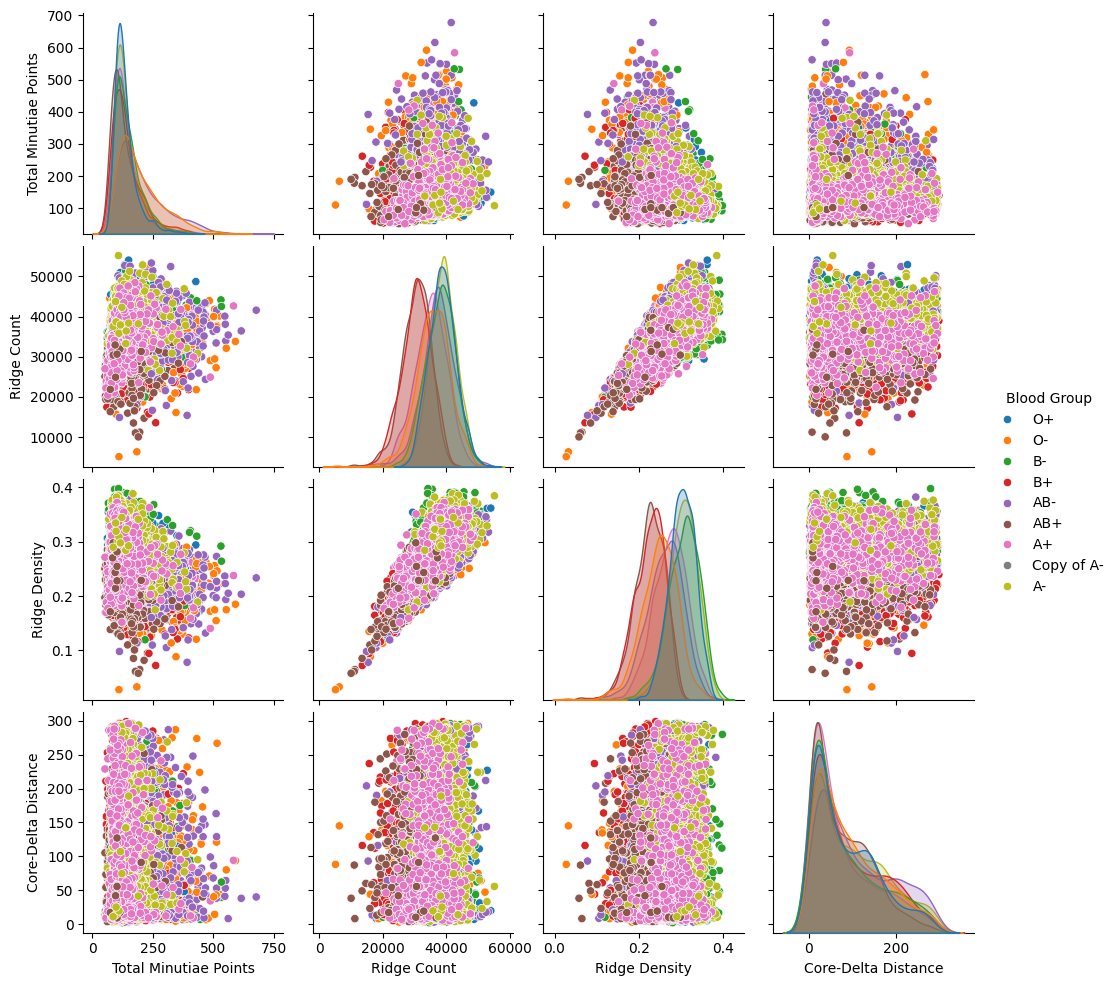

In [ ]:

# Pairplot to see relationships between all numerical features
sns.pairplot(df, hue="Blood Group", diag_kind="kde")
plt.show()


Interpretation: The pairplot helps us see relationships between numerical features like Ridge Density, Core-Delta Distance, and Total Minutiae Points. Each point is color-coded according to blood group.
Importance: This visualization allows us to check for patterns, correlations, and clusters within the dataset, which is essential in statistical analysis and predictive modeling.

<ipython-input-11-3d670dbcd43b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Blood Group"], y=df["Ridge Density"], palette="Set2")


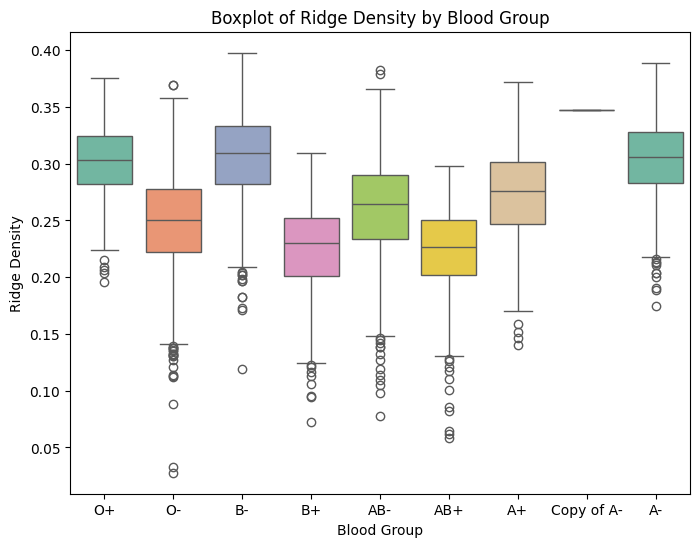

In [ ]:
# Boxplot for Ridge Density across different Blood Groups
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Blood Group"], y=df["Ridge Density"], palette="Set2")
plt.xlabel("Blood Group")
plt.ylabel("Ridge Density")
plt.title("Boxplot of Ridge Density by Blood Group")
plt.show()

Interpretation: This boxplot compares the ridge density distribution across different blood groups. We can see which blood groups tend to have higher or lower ridge densities and whether there are any outliers.
Importance: Identifying variations in ridge density can have implications in forensic science, where fingerprint analysis plays a key role in identity verification.

<ipython-input-12-03dc45b2065a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Blood Group"], y=df["Total Minutiae Points"], palette="coolwarm")


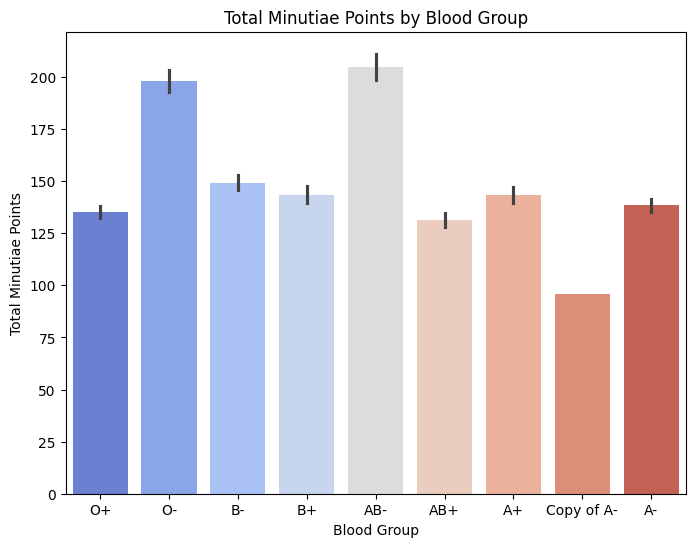

In [ ]:
# Bar plot for Total Minutiae Points per Blood Group
plt.figure(figsize=(8,6))
sns.barplot(x=df["Blood Group"], y=df["Total Minutiae Points"], palette="coolwarm")
plt.xlabel("Blood Group")
plt.ylabel("Total Minutiae Points")
plt.title("Total Minutiae Points by Blood Group")
plt.show()

Interpretation: This bar plot represents the average number of minutiae points (fingerprint characteristics) for each blood group. Some groups have higher minutiae points, indicating more complex fingerprint structures.
Importance: Such analysis is important for fingerprint recognition systems and forensic investigations, where minutiae points are key identifiers.